In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
kims = pd.read_csv("adult_5kims_0.01ew_200epochs.csv")
kims["Method"] = "Kim et al."

cvae = pd.read_csv("adult_cae.csv")
cvae["Method"] = "Ours - CVAE"

sinn = pd.read_csv("adult_inn_ae_encoder.csv")
sinn["Method"] = "Ours - INN"

base = pd.read_csv("adult_naive_baseline_200epochs.csv")
base["Method"] = "CNN"

all_data = pd.concat([kims, base, cvae, sinn], axis='rows', sort=False)

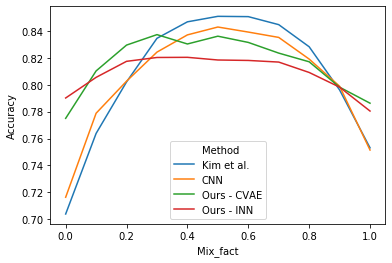

In [3]:
sns.lineplot(x='Mix_fact', y="Accuracy", data=all_data, hue="Method")

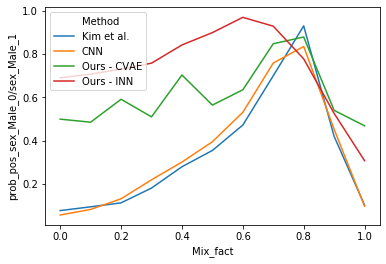

In [4]:
sns.lineplot(x='Mix_fact', y="prob_pos_sex_Male_0/sex_Male_1", data=all_data, hue="Method")

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

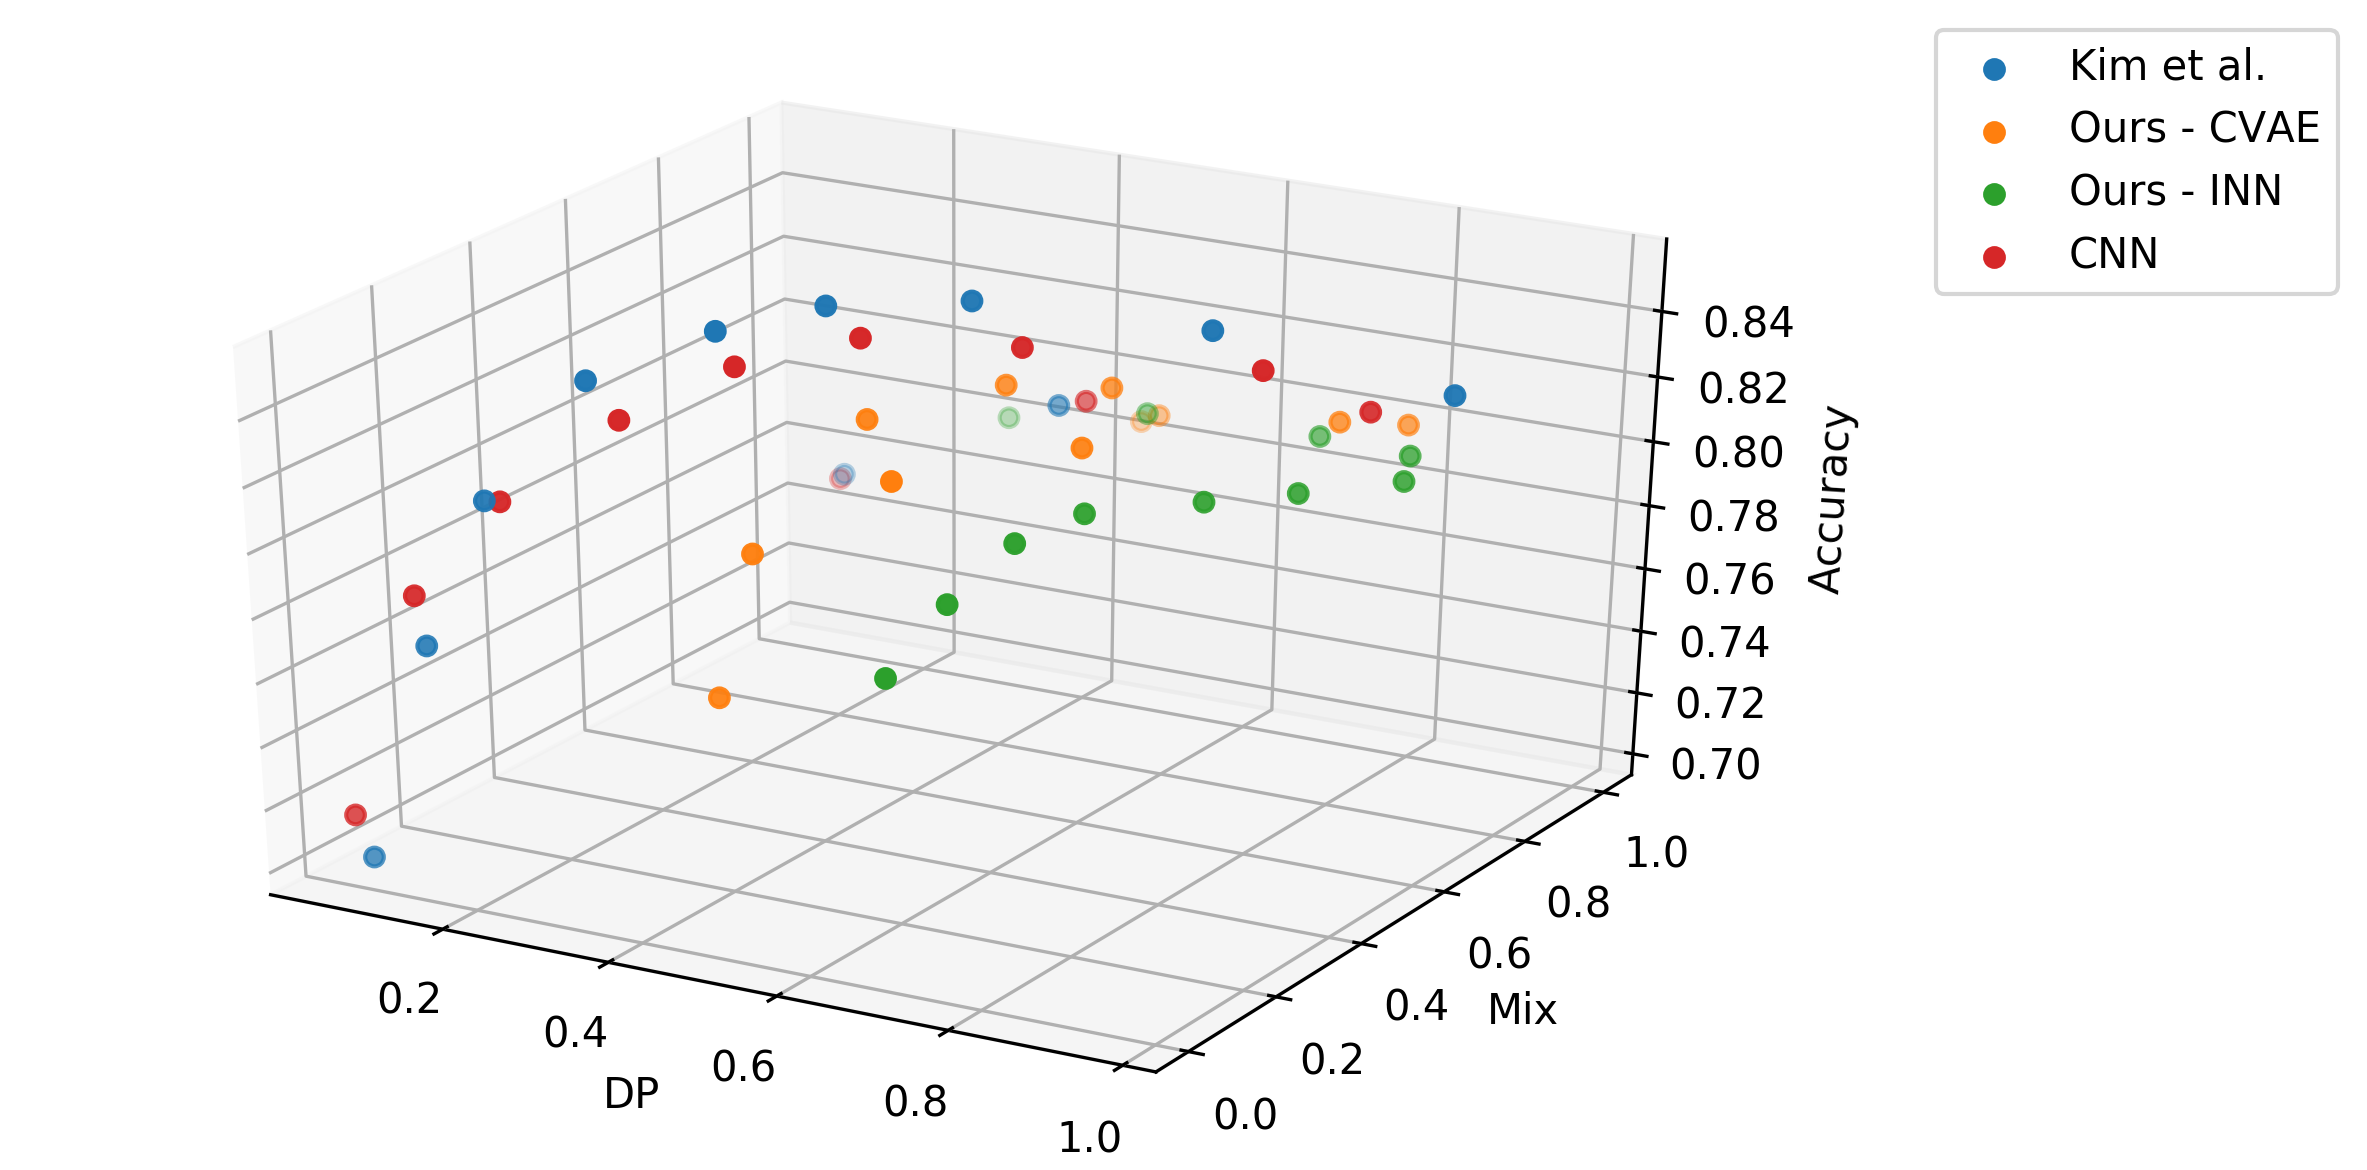

In [6]:
threedee = plt.figure(figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k').gca(projection='3d')
for method in ["Kim et al.", "Ours - CVAE", "Ours - INN", "CNN"]:
    threedee.scatter(
        
        all_data[all_data["Method"]== method]['prob_pos_sex_Male_0/sex_Male_1'],
        all_data[all_data["Method"]== method]['Mix_fact'],
        all_data[all_data["Method"]== method]['Accuracy'],
        label=method
    )
threedee.set_ylabel('Mix')
threedee.set_zlabel('Accuracy')
threedee.set_xlabel('DP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()